In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [225]:
train = pd.read_csv('train.csv', parse_dates=[1])
test = pd.read_csv('test.csv', parse_dates=[1])
df = train.copy()
df_test = test.copy()

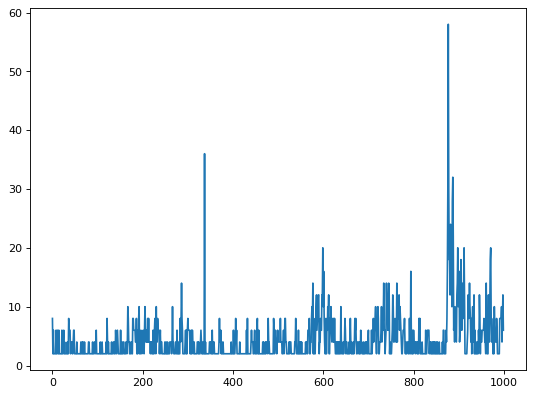

In [226]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Count[0:1000])

In [227]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [228]:
df['year'] = df.Datetime.dt.year
df['month'] = df.Datetime.dt.month
df['day'] = df.Datetime.dt.day
df['hour'] = df.Datetime.dt.hour
df_test['year'] = df_test.Datetime.dt.year
df_test['month'] = df_test.Datetime.dt.month
df_test['day'] = df_test.Datetime.dt.day
df_test['hour'] = df_test.Datetime.dt.hour

In [229]:
df_test.head()

,ID,Datetime,year,month,day,hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [230]:
df.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [231]:
def qrtr(x):
    if x['month'] < 4:
        return 1
    elif x['month'] >=4 and x['month'] < 7:
        return 2
    elif x['month'] >=7 and x['month'] < 10:
        return 3
    elif x['month'] >=10 and x['month'] < 13:
        return 4

In [232]:
df['qrtr'] = df.apply(qrtr, axis=1)
df_test['qrtr'] = df_test.apply(qrtr, axis=1)

In [233]:
# df['year'] = df.year - 2000
# df_test['year'] = df_test.year - 2000

In [234]:
df['qrtr'] = df.qrtr.astype(str)
df_test['qrtr'] = df_test.qrtr.astype(str)

In [235]:
# df['yp2'] = df.year **2
# df_test['yp2'] = df_test.year **2

In [237]:
df.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
year                 int64
month                int64
day                  int64
hour                 int64
qrtr                object
yp2                  int64
dtype: object

In [238]:
df = pd.get_dummies(df,prefix=['qrtr'],columns=['qrtr'], drop_first=True)
df_test = pd.get_dummies(df_test,prefix=['qrtr'],columns=['qrtr'], drop_first=True)

In [239]:
df.head()

,ID,Datetime,Count,year,month,day,hour,yp2,qrtr_2,qrtr_3,qrtr_4
0,0,2012-08-25 00:00:00,8,12,8,25,0,144,0,1,0
1,1,2012-08-25 01:00:00,2,12,8,25,1,144,0,1,0
2,2,2012-08-25 02:00:00,6,12,8,25,2,144,0,1,0
3,3,2012-08-25 03:00:00,2,12,8,25,3,144,0,1,0
4,4,2012-08-25 04:00:00,2,12,8,25,4,144,0,1,0


In [240]:
X = df.drop(['ID','Datetime','Count'],axis =1)

In [241]:
y = df.Count

In [242]:
X

,year,month,day,hour,yp2,qrtr_2,qrtr_3,qrtr_4
0,12,8,25,0,144,0,1,0
1,12,8,25,1,144,0,1,0
2,12,8,25,2,144,0,1,0
3,12,8,25,3,144,0,1,0
4,12,8,25,4,144,0,1,0
...,...,...,...,...,...,...,...,...
18283,14,9,25,19,196,0,1,0
18284,14,9,25,20,196,0,1,0
18285,14,9,25,21,196,0,1,0
18286,14,9,25,22,196,0,1,0


In [246]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [280]:
import statsmodels.api as sm

In [295]:
X_ols = sm.add_constant(X)

In [315]:
model = sm.OLS(y,X_ols)

In [316]:
results = model.fit()

In [317]:
results.params

const     8347.339268
year     -1444.591762
month        8.074083
day          1.149554
hour         4.476450
yp2         61.381488
qrtr_2      14.744469
qrtr_3      35.885596
qrtr_4       8.829167
dtype: float64

In [318]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3369.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:01:20   Log-Likelihood:            -1.0972e+05
No. Observations:               18288   AIC:                         2.195e+05
Df Residuals:                   18279   BIC:                         2.195e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8347.3393    257.844     32.374      0.000    7841.941    8852.737
year       -1444.5918     39.382    -36.681      0.000   -1521.785   -1367.399
month          8.0741      0.884      9.132      0.000       6.341       9.807
day            1.1496      0.083     13.832      0.000       0.987       1.312
hour           4.4764      0.104     42.943      0.000       4.272       4.681
yp2           61.3815      1.502     40.864      0.000      58.437      64.326
qrtr_2        14.7445      3.369      4.377      0.000       8.141      21.348
qrtr_3        35.8856      5.710      6.285      0.000      24.694      47.077
qrtr_4         8.8292      8.203      1.076      0.282      -7.249      24.908
==============================================================================
Omnibus:                     7374.883   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54681.037
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      10.703   Cond. No.                     6.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [322]:
X_train,X_test,y_train,y_test = train_test_split(X_ols,y,test_size = 0.3)

In [323]:
X_train.shape , X_test.shape

((12801, 9), (5487, 9))

In [324]:
mlr = LinearRegression()

In [325]:
model_l = mlr.fit(X_train,y_train)

In [326]:
y_pred = model_l.predict(X_train)

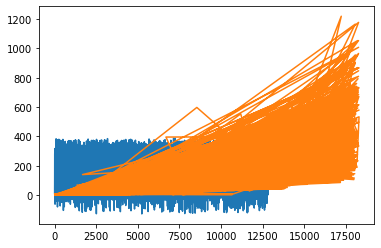

In [327]:
plt.plot(y_pred)
plt.plot(y_test)